In [1]:
# import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# sns.set_style("whitegrid")

from attrdict import AttrDict
from drivers import *
import os
import seaborn as sns
import results

/Users/lguerdan/.virtualenvs/10701-Project/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<AxesSubplot:xlabel='NS', ylabel='ACC'>

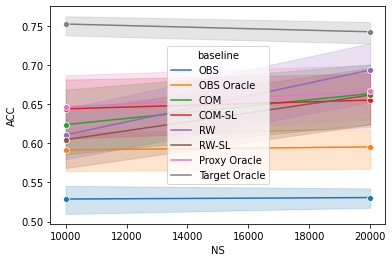

In [28]:
df, meandf  = results.get_erm_convergence_result_df('erm_convergence_rates_debug')

df.reset_index(inplace=True)
sns.lineplot(data=df, x="NS", y="ACC", hue='baseline', ci=95, marker='o')

In [30]:
df[]

,index,Unnamed: 0,alpha_0,alpha_1,beta_0,beta_1,alpha_0_hat,beta_0_hat,benchmark,NS,AU-ROC,ACC,do,baseline
0,0,0,0.1,0,0.3,0,0.160578,0.344577,synthetic_1D_sinusoidal,20000,0.584110,0.532167,0,OBS
1,1,1,0.1,0,0.3,0,0.160578,0.344577,synthetic_1D_sinusoidal,20000,0.663139,0.609833,0,OBS Oracle
2,2,2,0.1,0,0.3,0,0.160578,0.344577,synthetic_1D_sinusoidal,20000,0.762251,0.706167,0,COM
3,3,3,0.1,0,0.3,0,0.160578,0.344577,synthetic_1D_sinusoidal,20000,0.830447,0.756667,0,COM-SL
4,4,4,0.1,0,0.3,0,0.160578,0.344577,synthetic_1D_sinusoidal,20000,0.684172,0.535500,0,RW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,115,115,0.3,0,0.1,0,0.262576,0.287824,synthetic_1D_sinusoidal,10000,0.666715,0.545333,0,COM-SL
236,116,116,0.3,0,0.1,0,0.262576,0.287824,synthetic_1D_sinusoidal,10000,0.739506,0.554667,0,RW
237,117,117,0.3,0,0.1,0,0.262576,0.287824,synthetic_1D_sinusoidal,10000,0.709871,0.568000,0,RW-SL
238,118,118,0.3,0,0.1,0,0.262576,0.287824,synthetic_1D_sinusoidal,10000,0.794254,0.562667,0,Proxy Oracle


In [31]:
df.groupby(['NS', 'alpha_0','beta_0', 'baseline']).mean()

index  Unnamed: 0  alpha_1  beta_1  \
NS    alpha_0 beta_0 baseline                                            
10000 0.1     0.3    COM             18.0        18.0      0.0     0.0   
                     COM-SL          19.0        19.0      0.0     0.0   
                     OBS             16.0        16.0      0.0     0.0   
                     OBS Oracle      17.0        17.0      0.0     0.0   
                     Proxy Oracle    22.0        22.0      0.0     0.0   
                     RW              20.0        20.0      0.0     0.0   
                     RW-SL           21.0        21.0      0.0     0.0   
                     Target Oracle   23.0        23.0      0.0     0.0   
      0.2     0.2    COM             58.0        58.0      0.0     0.0   
                     COM-SL          59.0        59.0      0.0     0.0   
                     OBS             56.0        56.0      0.0     0.0   
                     OBS Oracle      57.0        57.0      0.0     0.0   
                     Proxy Oracle    62.0        62.0      0.0     0.0   
                     RW              60.0        60.0      0.0     0.0   
                     RW-SL           61.0        61.0      0.0     0.0   
                     Target Oracle   63.0        63.0      0.0     0.0   
      0.3     0.1    COM             98.0        98.0      0.0     0.0   
                     COM-SL          99.0        99.0      0.0     0.0   
                     OBS             96.0        96.0      0.0     0.0   
                     OBS Oracle      97.0        97.0      0.0     0.0   
                     Proxy Oracle   102.0       102.0      0.0     0.0   
                     RW             100.0       100.0      0.0     0.0   
                     RW-SL          101.0       101.0      0.0     0.0   
                     Target Oracle  103.0       103.0      0.0     0.0   
20000 0.1     0.3    COM             18.0        18.0      0.0     0.0   
                     COM-SL          19.0        19.0      0.0     0.0   
                     OBS             16.0        16.0      0.0     0.0   
                     OBS Oracle      17.0        17.0      0.0     0.0   
                     Proxy Oracle    22.0        22.0      0.0     0.0   
                     RW              20.0        20.0      0.0     0.0   
                     RW-SL           21.0        21.0      0.0     0.0   
                     Target Oracle   23.0        23.0      0.0     0.0   
      0.2     0.2    COM             58.0        58.0      0.0     0.0   
                     COM-SL          59.0        59.0      0.0     0.0   
                     OBS             56.0        56.0      0.0     0.0   
                     OBS Oracle      57.0        57.0      0.0     0.0   
                     Proxy Oracle    62.0        62.0      0.0     0.0   
                     RW              60.0        60.0      0.0     0.0   
                     RW-SL           61.0        61.0      0.0     0.0   
                     Target Oracle   63.0        63.0      0.0     0.0   
      0.3     0.1    COM             98.0        98.0      0.0     0.0   
                     COM-SL          99.0        99.0      0.0     0.0   
                     OBS             96.0        96.0      0.0     0.0   
                     OBS Oracle      97.0        97.0      0.0     0.0   
                     Proxy Oracle   102.0       102.0      0.0     0.0   
                     RW             100.0       100.0      0.0     0.0   
                     RW-SL          101.0       101.0      0.0     0.0   
                     Target Oracle  103.0       103.0      0.0     0.0   

                                    alpha_0_hat  beta_0_hat    AU-ROC  \
NS    alpha_0 beta_0 baseline                                           
10000 0.1     0.3    COM               0.237133    0.481345  0.756583   
                     COM-SL            0.237133    0.481345  0.757915   
                     OBS               0.23

In [3]:
from attrdict import AttrDict


exp_config = AttrDict({

    # Benchmark configuration
    'benchmark': {
        'name': 'synthetic_1D_sinusoidal',
        'NS': 1000,
        'config': {
            'Y0_PDF': 'piecewise_sinusoid',
            'Y1_PDF': 'low_base_rate_sinusoid',
            'PI_PDF': 'linear'
            }
    },

    'log_dir': 'results',

    'sample_sizes': [5000, 10000, 20000, 30000, 40000, 50000, 60000],
    
    # Experimental setup 
    'learn_weights': True,
    'learn_parameters': True,
    
    # Hyperparameters
    'n_epochs': 3,
    'n_runs': 1,
    
    'target_POs': [0],
    'policy_gamma': 0,
   
    # Data params
    'train_ratio': .7,
    'split_erm': True,
    'crossfit_erm': True,
    'split_ccpe': True,
    'crossfit_ccpe': True,

    'error_params': [{
        'alpha_0': 0.5,
        'alpha_1': 0,
        'beta_0': 0.1,
        'beta_1': 0 
    }],

    'baselines': [{
            'model': 'OBS',
            'target': 'Y',
            'conditional': False,
            'sl': False,
            'reweight': False
        },{
            'model': 'OBS Oracle',
            'target': 'YS',
            'conditional': False,
            'sl': False,
            'reweight': False
        },{
            'model': 'COM',
            'target': 'Y',
            'conditional': True,
            'sl': False,
            'reweight': False
        },{
            'model': 'COM-SL',
            'target': 'Y',
            'conditional': True,
            'sl': True,
            'reweight': False
        },{
            'model': 'RW',
            'target': 'Y',
            'conditional': True,
            'sl': False,
            'reweight': True
        },{
            'model': 'RW-SL',
            'target': 'Y',
            'conditional': True,
            'sl': True,
            'reweight': True
        },{
            'model': 'Proxy Oracle',
            'target': f'Y',
            'conditional': True,
            'sl': False,
            'reweight': False
        },{
            'model': 'Target Oracle',
            'target': f'YS',
            'conditional': True,
            'sl': False,
            'reweight': False
    }]
})

In [2]:
exp_config = AttrDict({
#     'benchmark': {
#         'name': 'synthetic_1D_sinusoidal',
#         'NS': 1000,
#         'config': {
#             'Y0_PDF': 'piecewise_sinusoid',
#             'Y1_PDF': 'low_base_rate_sinusoid',
#             'PI_PDF': 'linear'
#             }
#     },
    
    'benchmark': {
        'name': 'synthetic_2D_linsep',
        'NS': 5000,
        'config': {
            'Y0_PDF': '2D_linsep_baseline',
            'Y1_PDF': '2D_linsep_intervention',
            'PI_PDF': '6cov_linear'
        }
    },
    
    'log_dir': 'results',
    
    # Experimental setup 
    'learn_weights': True,
    'learn_parameters': True,
    
    # Hyperparameters
    'n_epochs': 3,
    'n_runs': 1,
    
    'target_POs': [0, 1],
    
    'policy_gamma': 0,
    'train_ratio': .7,
    
    'split_erm': True,
    'crossfit_erm': True,
    'split_ccpe': True,
    'crossfit_ccpe': True,
})

error_params = [AttrDict({
    'alpha_0': 0.5,
    'alpha_1': 0,
    'beta_0': 0.1,
    'beta_1': 0 
})]

# baselines = [AttrDict({
#     'model': 'OBS',
#     'target': 'Y',
#     'conditional': False,
#     'sl': False,
#     'reweight': False
# }), AttrDict({
#     'model': 'OBS Oracle',
#     'target': 'YS',
#     'conditional': False,
#     'sl': False,
#     'reweight': False
# }), AttrDict({
#     'model': 'COM',
#     'target': 'Y',
#     'conditional': True,
#     'sl': False,
#     'reweight': False
# }), AttrDict({
#     'model': 'COM-SL',
#     'target': 'Y',
#     'conditional': True,
#     'sl': True,
#     'reweight': False
# }), AttrDict({
#     'model': 'RW',
#     'target': 'Y',
#     'conditional': True,
#     'sl': False,
#     'reweight': True
# }), AttrDict({
#     'model': 'RW-SL',
#     'target': 'Y',
#     'conditional': True,
#     'sl': True,
#     'reweight': True
# }), AttrDict({
#     'model': 'Proxy Oracle',
#     'target': f'Y',
#     'conditional': True,
#     'sl': False,
#     'reweight': False
# }), AttrDict({
#     'model': 'Target Oracle',
#     'target': f'YS',
#     'conditional': True,
#     'sl': True,
#     'reweight': False
# })]
baselines = [AttrDict({
    'model': 'Target Oracle',
    'target': f'YS',
    'conditional': True,
    'sl': False,
    'reweight': False
})]

po_results, te_results =  run_risk_minimization_exp(exp_config, baselines, error_params, exp_name='synth_baseline_comparison')



AttributeError: 'AttrDict' instance has no attribute 'sample_sizes'

## Debugging JOBS performance

In [1]:
from attrdict import AttrDict
from data import loaders
from model import MLP, train, evaluate
import numpy as np
import matplotlib.pyplot as plt
import drivers, erm

/Users/lguerdan/.virtualenvs/10701-Project/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
config = AttrDict({
  "benchmarks": [{
      "name": "jobs",
      "train_path": "data/JOBS/jobs_DW_bin.new.10.train.npz",
      "test_path": "data/JOBS/jobs_DW_bin.new.10.test.npz"
    }],
  "log_dir": "results",
  "sample_sizes": [12994],
  "learn_weights": False,
  "learn_parameters": False,
  "lr": 0.001,
  "milestone": 20,
  "gamma": 0.5,
  "n_epochs": 15,
  "n_runs": 1,
  "target_POs": [0, 1],
  "policy_gamma": 0,
  "train_ratio": 0.7,
  "split_erm": True,
  "crossfit_erm": True,
  "split_ccpe": True,
  "crossfit_ccpe": True,
  "error_params": [
    { "alpha_0": 0.1, "alpha_1": 0, "beta_0": 0.3, "beta_1": 0 },
  ],
  "baselines": [{
      "model": "Target Oracle",
      "target": "YS",
      "conditional": True,
      "sl": False,
      "reweight": False
  }]
})

loss_config = AttrDict({
    'alpha': None,
    'beta':  None,
    'do': 0,
    'reweight': False,
    'sl': False
})

for i in range(5):

    X_train, X_test, Y_train, Y_test = loaders.get_benchmark(config.benchmarks[0], config.error_params[0], 10000)

    dataset = AttrDict({
        'X_train': X_train,
        'X_test': X_test,
        'Y_train': Y_train,
        'Y_test': Y_test
    })


    preds, metrics = erm.run_erm_split(
                    erm_dataset=dataset,
                    baseline_config=config.baselines[0],
                    loss_config=loss_config,
                    exp_config=config
                )

    print('ATE: estimate', preds[1][Y_test['E'] == 1].mean() - preds[0][Y_test['E'] == 1].mean())



AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:10<00:00,  1.46it/s]


AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:08<00:00,  1.70it/s]


ATE: estimate 0.12308803
AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:10<00:00,  1.48it/s]


AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:09<00:00,  1.56it/s]


ATE: estimate -0.08510579
AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:10<00:00,  1.38it/s]


AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:09<00:00,  1.63it/s]


ATE: estimate -0.080497876
AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:09<00:00,  1.51it/s]


AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:09<00:00,  1.60it/s]


ATE: estimate -0.11961451
AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:11<00:00,  1.36it/s]


AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:09<00:00,  1.53it/s]


ATE: estimate -0.1151558
AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:10<00:00,  1.38it/s]


AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:10<00:00,  1.48it/s]


ATE: estimate 0.26898083
AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:11<00:00,  1.26it/s]


AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:10<00:00,  1.49it/s]


ATE: estimate -0.091164574
AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:12<00:00,  1.25it/s]


AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:09<00:00,  1.51it/s]


ATE: estimate -0.05387722
AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:11<00:00,  1.32it/s]


AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:09<00:00,  1.54it/s]


ATE: estimate -0.039915815
AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:10<00:00,  1.41it/s]


AttrDict({'model': 'Target Oracle', 'target': 'YS', 'conditional': True, 'sl': False, 'reweight': False})


ERM: Target Oracle: 100%|███████████████████████| 15/15 [00:10<00:00,  1.44it/s]


ATE: estimate -0.030462354


In [35]:
preds[1][Y_test['E'] == 1].mean()-preds[0][Y_test['E'] == 1].mean()

-0.030462354

0.30174676

In [25]:
preds

{0: array([2.29444489e-01, 4.37523037e-01, 3.23707163e-01, 5.30269109e-02,
        3.00182551e-01, 4.22060519e-01, 4.33774084e-01, 1.18206523e-01,
        4.33774084e-01, 3.88463050e-01, 2.49015525e-01, 3.13880175e-01,
        1.74143702e-01, 4.26549166e-01, 4.26549166e-01, 3.45549732e-01,
        4.26549166e-01, 3.96665365e-01, 4.26549166e-01, 4.14369732e-01,
        3.12387288e-01, 4.14369732e-01, 4.14369732e-01, 4.14369732e-01,
        3.17232668e-01, 3.94209355e-01, 3.14126760e-01, 3.24330330e-01,
        3.94209355e-01, 2.85941064e-01, 5.91910481e-01, 3.66253346e-01,
        3.66253376e-01, 3.66253376e-01, 3.66253376e-01, 3.66253376e-01,
        3.66253376e-01, 2.33765438e-01, 2.47239977e-01, 2.50684619e-01,
        3.02467883e-01, 2.93638289e-01, 4.19633597e-01, 4.19633597e-01,
        4.00327116e-01, 4.00327116e-01, 3.03251803e-01, 4.05976176e-01,
        1.45052150e-01, 3.30153674e-01, 3.32247913e-01, 3.40707153e-01,
        2.11003527e-01, 3.15636218e-01, 2.49267936e-01, 3.225

In [21]:
preds[1][Y_test['E'] == 1].mean() - preds[0][Y_test['E'] == 1].mean()

-0.05556625

In [26]:
Y_test[(Y_test['E'] == 1) & (Y_test['D'] == 0)]['YS_0'].mean()

0.3191489361702128

In [23]:
Y_test[(Y_test['E'] == 1) & (Y_test['D'] == 1)]['YS_1'].mean() - Y_test[(Y_test['E'] == 1) & (Y_test['D'] == 0)]['YS_0'].mean()


-0.088379705400982

In [14]:
Y_test['YS_0'].mean()

0.15566625155666253

In [ ]:
preds[0].mean()

In [11]:
preds[1].mean() 

0.27853668

0.18840663

In [10]:
te_df.columns.tolist()

['alpha_0',
 'alpha_1',
 'beta_0',
 'beta_1',
 'alpha_0_hat',
 'beta_0_hat',
 'alpha_1_hat',
 'beta_1_hat',
 'benchmark',
 'NS',
 'val_loss',
 'ate',
 'ate_hat',
 'ate_error',
 'pr_-0.3',
 'pr_-0.25',
 'pr_-0.2',
 'pr_-0.15',
 'pr_-0.1',
 'pr_-0.05',
 'pr_0',
 'pr_0.05',
 'pr_0.1',
 'pr_0.15',
 'pr_0.2',
 'pr_0.25',
 'pr_0.3',
 'pr_0.35',
 'pr_0.4',
 'pr_0.45',
 'pr_0.5',
 'pr_0.55',
 'pr_0.6',
 'baseline']

## Debugging synthetic environment configuration

In [2]:
from attrdict import AttrDict
from data import loaders
from model import MLP, train, evaluate
import numpy as np
import matplotlib.pyplot as plt

In [15]:
benchmark =  AttrDict({
    'name': 'synthetic_1D_sinusoidal',
    'NS': 10000,
    'config': {
        'Y0_PDF': 'piecewise_sinusoid',
        'Y1_PDF': 'low_base_rate_sinusoid',
        'PI_PDF': 'linear'
        }
})

error_params = AttrDict({
    'alpha_0': 0.1,
    'alpha_1': 0,
    'beta_0': 0.3,
    'beta_1': 0 
})

for i in range(2):

    X_train, X_test, Y_train, Y_test = loaders.get_benchmark(benchmark, error_params, 60000)

    train_loader, test_loader = loaders.get_loaders(
        X_train=X_train,
        YCF_train=Y_train,
        X_test=X_test,
        YCF_test=Y_test,
        target='Y', 
        do=0,
        conditional=True
    )

    loss_config = AttrDict({
            'alpha': None,
            'beta':  None,
            'do': 0,
            'reweight': False
        })


    eta_model = MLP(n_feats=X_train.shape[1])
    train_losses = train(eta_model, train_loader, loss_config=loss_config,
                         n_epochs=10, lr=.005, milestone=10, gamma=0.1, desc="Proxy Oracle")
    metrics, py_hat  = evaluate(eta_model, test_loader)

    print('train_loss', train_losses)
    print('metrics:', metrics)
    print('alpha hat:', error_params['alpha_0'] - py_hat.min())
    print('beta hat:', error_params['beta_0'] - (1-py_hat.max()))
    
    

Proxy Oracle: 100%|█████████████████████████████| 10/10 [00:14<00:00,  1.47s/it]


train_loss [417.1732856929302, 404.11929500102997, 401.0788828134537, 399.293691188097, 395.2039424479008, 393.00864440202713, 392.35615277290344, 391.1171233654022, 391.3177989423275, 391.1796694993973]
metrics: AttrDict({'AU-ROC': 0.8380093471663737, 'ACC': 0.7540555555555556, 'loss': 0.5492091548908672})
alpha hat: -0.020846815407276148
beta hat: 0.016080009937286366


Proxy Oracle: 100%|█████████████████████████████| 10/10 [00:14<00:00,  1.40s/it]


train_loss [421.88884100317955, 418.74214458465576, 417.41608595848083, 416.97894379496574, 417.2853065431118, 416.9351713657379, 416.5809922814369, 416.94799223542213, 416.7196954488754, 416.7105756998062]
metrics: AttrDict({'AU-ROC': 0.6363336999540279, 'ACC': 0.494, 'loss': 0.6535285120535491})
alpha hat: -0.0020197942852973882
beta hat: -0.2499946177005768


<AxesSubplot:>

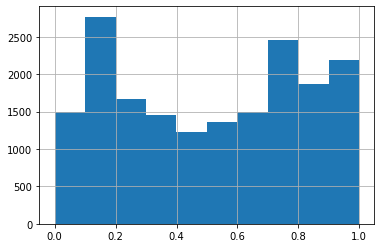

In [10]:
# Old one with performance difference
Y_test['pYS_0'].hist()

<AxesSubplot:>

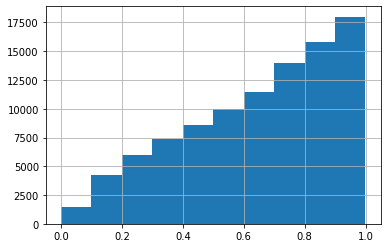

In [11]:
# Old one with performance difference
Y_test['pYS_0'].hist(cumulative=True)

In [12]:
import pandas as pd
val_preds = pd.DataFrame({
    'yhat': py_hat.squeeze(),
    'y': Y_test['pYS_0'].squeeze(),
    'x': X_test.squeeze()
})

val_preds = val_preds.sort_values(by='x')

In [13]:
print(metrics)

AttrDict({'AU-ROC': 0.8311343172234612, 'ACC': 0.6376666666666667, 'loss': 0.569290828323703})


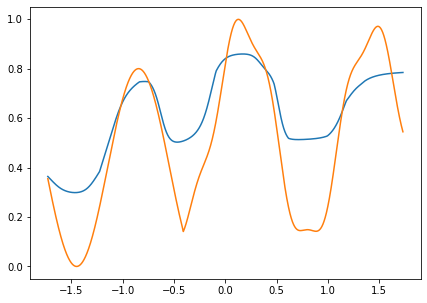

In [14]:
f, axs = plt.subplots(1, 1, sharey=False, figsize=(7,5))
axs.plot(val_preds['x'], val_preds['yhat'], label=f'$\eta^*$')
axs.plot(val_preds['x'], val_preds['y'], label=f'$\eta$')

In [8]:
val_preds['yhat'].max()
val_preds['yhat'].min()

0.24906175

In [ ]:
def viz_ccpe_estimates(Y_train, Y_test, debug_info, alpha, beta, do, y0_pdf, y1_pdf, pi_pdf):

    X = expdf['X'].to_numpy()
    pdf = y0_pdf if do==0 else y1_pdf
    eta_d_star = eta(X, pdf)
    eta_d = ccn_model(eta_d_star, alpha, beta)
    pix = pi(X, pi_pdf)

    f, axs = plt.subplots(1, 1, sharey=False, figsize=(7,5))

    # Class probability functions
    axs.plot(X, eta_d_star, label=f'$\eta^*_{do}(x)$')
    axs.plot(X, eta_d, label=f'$\eta_{do}(x)$', color='black')
    axs.plot(X, pix, label='$\pi(x)$', color='orange', linestyle='--')
    plt.scatter(debug_info['val_x'], debug_info['val_py'], marker='x', color='black', label=f'$\hat\eta_{do}(x)$')
    plt.legend(bbox_to_anchor=(1.2, 1))
    plt.xlabel('X')
    plt.ylabel('P')

    plt.title(f'risk under D={do}, alpha={alpha:2}, beta={beta:2}')


In [ ]:
viz_ccpe_estimates()